<a href="https://colab.research.google.com/github/AnnabelWei/BoxOffice_Prediction/blob/main/DATA_PREP_EDA_BOX_OFFICE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1: data downloading from kaggle (must upload your kaggle api)

In [ ]:
### data downloading
!pip install -q kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c 'tmdb-box-office-prediction'

!unzip tmdb-box-office-prediction.zip

 69% 12.0M/17.4M [00:00<00:00, 35.8MB/s]
100% 17.4M/17.4M [00:00<00:00, 52.2MB/s]
Archive:  tmdb-box-office-prediction.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


## Step 2: Initial Data Understanding and Observation

In [ ]:
import pandas as pd

# Load the data
data = pd.read_csv('train.csv')

# Display the first few rows of the dataset
data.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


### Initial Observations:

1. The dataset consists of 23 columns and a sample of 5 rows is displayed above.
2. Columns such as `belongs_to_collection`, `homepage`, `production_companies`, `tagline`, and `Keywords` have missing values.
3. The dataset contains a mix of numerical, categorical, and text data.
4. Columns like `genres`, `production_companies`, `production_countries`, `spoken_languages`, `cast`, and `crew` contain structured string data (possibly JSON format) which will need further parsing.
5. The `revenue` column, which is our target variable, is of integer data type and doesn't have any missing values.
6. The `release_date` column is in string format and might need conversion to a datetime format for further analysis.

Next, let's get a more detailed summary of the dataset, including data types, number of missing values, and basic statistics for numerical columns.

In [ ]:
# Display the data types of each column
data_types = data.dtypes

# Display the number of missing values for each column
missing_values = data.isnull().sum()

# Display basic statistics for numerical columns
data_description = data.describe()

data_types, missing_values, data_description

(id                         int64
 belongs_to_collection     object
 budget                     int64
 genres                    object
 homepage                  object
 imdb_id                   object
 original_language         object
 original_title            object
 overview                  object
 popularity               float64
 poster_path               object
 production_companies      object
 production_countries      object
 release_date              object
 runtime                  float64
 spoken_languages          object
 status                    object
 tagline                   object
 title                     object
 Keywords                  object
 cast                      object
 crew                      object
 revenue                    int64
 dtype: object,
 id                          0
 belongs_to_collection    2396
 budget                      0
 genres                      7
 homepage                 2054
 imdb_id                     0
 original_langua

### Data Summary:

#### Data Types:
- The dataset has a mix of data types including integers (`int64`), floats (`float64`), and objects (`object`).
- Columns like `belongs_to_collection`, `genres`, `homepage`, `imdb_id`, `original_language`, `original_title`, `overview`, `poster_path`, `production_companies`, `production_countries`, `release_date`, `spoken_languages`, `status`, `tagline`, `title`, `Keywords`, `cast`, and `crew` are of type `object` which indicates they could be strings or mixed types.

#### Missing Values:
- Several columns have missing values. For instance, `belongs_to_collection` has 2396 missing values, indicating that many movies don't belong to a collection.
- `homepage` has 2054 missing values, suggesting that not all movies have an associated homepage.
- Other columns with missing values include `genres`, `overview`, `poster_path`, `production_companies`, `production_countries`, `runtime`, `spoken_languages`, `tagline`, `Keywords`, `cast`, and `crew`.

#### Basic Statistics:
- The `budget` column has movies with a budget of 0, which might indicate missing or unreported budgets.
- The `popularity` column has a wide range, with a minimum value close to 0 and a maximum of 294.33.
- The `runtime` column has a minimum value of 0, which is unusual and might indicate missing or incorrect data.
- The `revenue` column, which is our target variable, ranges from 1 to about 1.52 billion.

These initial observations provide a good starting point for our data cleaning and exploration steps. We'll need to address the missing values, parse structured string data, and further explore the distribution and relationships of various features.

## Step 3: Initial Data Cleaning

In this step, we'll address the following:
1. Handle missing values.
2. Convert data types where necessary.
3. Parse structured string data.

Let's start with handling missing values.

### 3.1 Handling Missing Values

We observed that several columns have missing values. Let's address them one by one:

1. `belongs_to_collection`: Missing values indicate that the movie doesn't belong to any collection. We can replace missing values with a string 'No Collection'.
2. `homepage`: Missing values can be replaced with 'No Homepage'.
3. `genres`, `production_companies`, `production_countries`, `spoken_languages`, `tagline`, `Keywords`, `cast`, and `crew`: These columns contain structured string data. We can replace missing values with an empty string or a placeholder indicating no data.
4. `runtime`: Missing values in runtime can be replaced with the median runtime of the dataset.
5. `overview`: Missing values can be replaced with 'No Overview'.

Let's start by handling these missing values.

In [ ]:
# Handling missing values

# Replace missing values for 'belongs_to_collection' and 'homepage'
data['belongs_to_collection'].fillna('No Collection', inplace=True)
data['homepage'].fillna('No Homepage', inplace=True)

# Replace missing values for columns with structured string data
columns_with_structured_data = ['genres', 'production_companies', 'production_countries', 'spoken_languages', 'tagline', 'Keywords', 'cast', 'crew']
for column in columns_with_structured_data:
    data[column].fillna('No Data', inplace=True)

# Replace missing values for 'runtime' with median runtime
median_runtime = data['runtime'].median()
data['runtime'].fillna(median_runtime, inplace=True)

# Replace missing values for 'overview'
data['overview'].fillna('No Overview', inplace=True)

# Check the number of missing values after handling
data.isnull().sum()

id                       0
belongs_to_collection    0
budget                   0
genres                   0
homepage                 0
imdb_id                  0
original_language        0
original_title           0
overview                 0
popularity               0
poster_path              1
production_companies     0
production_countries     0
release_date             0
runtime                  0
spoken_languages         0
status                   0
tagline                  0
title                    0
Keywords                 0
cast                     0
crew                     0
revenue                  0
dtype: int64

### Findings after Handling Missing Values:

- We have successfully addressed the missing values in the dataset.
- The only column with missing values now is `poster_path` with just 1 missing value. This column represents the path to the movie poster, and the missing value can be ignored as it won't significantly impact our analysis.

Next, we'll focus on converting data types where necessary.

### 3.2 Converting Data Types

From our initial observations, we identified that the `release_date` column is in string format. For better analysis and manipulation, it would be beneficial to convert this column to a datetime format.

Let's proceed with this conversion.

In [ ]:
# Convert 'release_date' column to datetime format
data['release_date'] = pd.to_datetime(data['release_date'], errors='coerce')

# Check the data type of 'release_date' column and any missing values introduced due to conversion
data['release_date'].dtype, data['release_date'].isnull().sum()

(dtype('<M8[ns]'), 0)

### Findings after Data Type Conversion:

- The `release_date` column has been successfully converted to datetime format (`<M8[ns]` is the internal representation for datetime64[ns] in pandas).
- No missing values were introduced during the conversion, which means all date strings in the column were valid and got converted successfully.

Next, we'll focus on parsing the structured string data in columns like `genres`, `production_companies`, and others.

### 3.3 Parsing Structured String Data

Several columns in the dataset (`genres`, `production_companies`, `production_countries`, `spoken_languages`, `Keywords`, `cast`, and `crew`) contain structured string data that looks like JSON format. To make this data more usable, we'll parse these strings and extract relevant information.

For simplicity, we'll start with the `genres` column and extract the genre names for each movie. We'll then apply similar logic to other columns.

In [ ]:
import json

def parse_json(column, key):
    '''
    Function to parse the structured string data and extract the desired information.
    '''
    try:
        json_data = json.loads(column.replace("'", '"'))
        return ', '.join([item[key] for item in json_data])
    except:
        return column

# Parse the 'genres' column to extract genre names
data['genres'] = data['genres'].apply(lambda x: parse_json(x, 'name'))

# Display the parsed 'genres' column
data['genres'].head()

0                            Comedy
1    Comedy, Drama, Family, Romance
2                             Drama
3                   Thriller, Drama
4                  Action, Thriller
Name: genres, dtype: object

In [ ]:
# Parse the 'production_companies' column to extract company names
data['production_companies'] = data['production_companies'].apply(lambda x: parse_json(x, 'name'))

# Display the parsed 'production_companies' column
data['production_companies'].head()

0    Paramount Pictures, United Artists, Metro-Gold...
1                                 Walt Disney Pictures
2    Bold Films, Blumhouse Productions, Right of Wa...
3                                              No Data
4                                              No Data
Name: production_companies, dtype: object



We'll continue this parsing process for the remaining columns: `production_countries`, `spoken_languages`, `Keywords`, `cast`, and `crew`.

In [ ]:
# Parse the 'production_countries' column to extract country names
data['production_countries'] = data['production_countries'].apply(lambda x: parse_json(x, 'name'))

# Parse the 'spoken_languages' column to extract language names
data['spoken_languages'] = data['spoken_languages'].apply(lambda x: parse_json(x, 'name'))

# Parse the 'Keywords' column to extract keyword names
data['Keywords'] = data['Keywords'].apply(lambda x: parse_json(x, 'name'))

# Parse the 'cast' column to extract cast names (we'll limit to top 5 cast members for simplicity)
data['cast'] = data['cast'].apply(lambda x: ', '.join(parse_json(x, 'name').split(', ')[:5]))

# Parse the 'crew' column to extract crew names (we'll limit to top 5 crew members for simplicity)
data['crew'] = data['crew'].apply(lambda x: ', '.join(parse_json(x, 'name').split(', ')[:5]))

# Display the parsed columns
data[['production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew']].head()

,production_countries,spoken_languages,Keywords,cast,crew
0,United States of America,English,"time travel, sequel, hot tub, duringcreditssti...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de..."
1,United States of America,English,"coronation, duty, marriage, falling in love","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de..."
2,United States of America,English,"jazz, obsession, conservatory, music teacher, ...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de..."
3,India,"English, हिन्दी","mystery, bollywood, police corruption, crime, ...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de..."
4,South Korea,한국어/조선말,No Data,"Kim Kang-woo, Jo Jae-hyeon, Park Si-yeon, Kim ...","[{'credit_id': '52fe464b9251416c75073b43', 'de..."




With this, we have completed the initial data cleaning process. The dataset is now in a cleaner and more structured format, ready for exploratory data analysis (EDA) and further processing.

## Step 4: Exploratory Data Analysis (EDA)

The primary goal of this EDA is to understand which features impact the `revenue` column and the nature of their effect. We'll explore the dataset using various visualizations and statistical methods to gain insights into the relationships between different features and the target variable (`revenue`).

We'll start by analyzing the distribution of the `revenue` column to understand its characteristics.

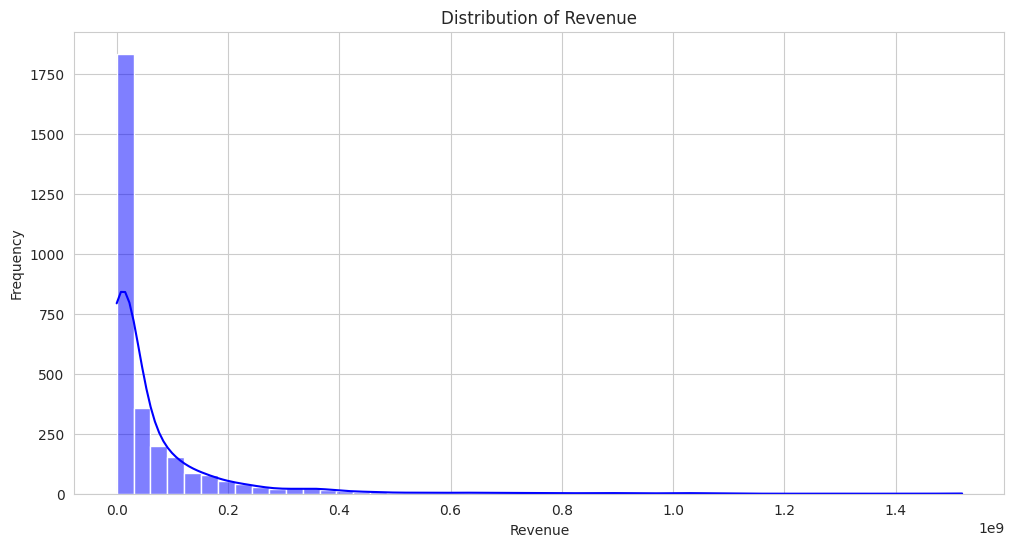

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn for better visualization
sns.set_style('whitegrid')

# Plotting the distribution of 'revenue'
plt.figure(figsize=(12, 6))
sns.histplot(data['revenue'], bins=50, kde=True, color='blue')
plt.title('Distribution of Revenue')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

### Observations on Revenue Distribution:

- The distribution of `revenue` is right-skewed, indicating that a majority of movies earn relatively low revenue, while a few movies achieve exceptionally high revenue.
- There's a peak near the zero revenue mark, suggesting that some movies might not have generated any revenue or the revenue data for them might be missing.

Next, we'll explore the relationship between the `budget` and `revenue` to understand if there's a correlation between the amount spent on producing a movie and the revenue it generates.

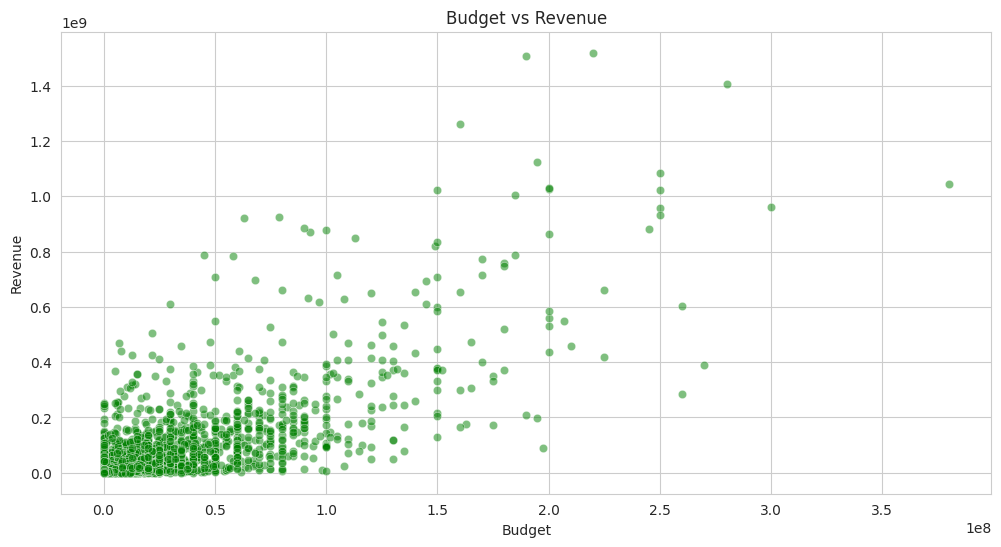

In [ ]:
# Plotting the relationship between 'budget' and 'revenue'
plt.figure(figsize=(12, 6))
sns.scatterplot(x=data['budget'], y=data['revenue'], alpha=0.5, color='green')
plt.title('Budget vs Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

### Observations on Budget vs Revenue:

- There seems to be a positive correlation between `budget` and `revenue`. As the budget of a movie increases, its revenue also tends to increase. This suggests that movies with higher production budgets often generate higher revenues.
- However, there are exceptions. Some movies with high budgets have low revenues, indicating that they might not have been successful at the box office.
- Similarly, there are movies with low budgets that have achieved high revenues, indicating that they were highly successful and provided a good return on investment.

Next, we'll explore the relationship between the `popularity` of a movie and its `revenue` to understand if more popular movies tend to generate higher revenues.

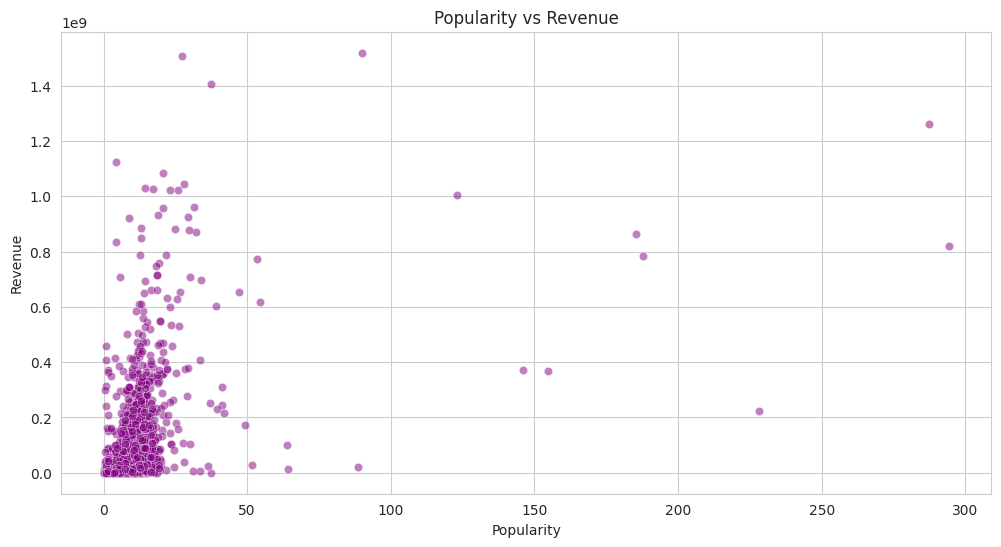

In [ ]:
# Plotting the relationship between 'popularity' and 'revenue'
plt.figure(figsize=(12, 6))
sns.scatterplot(x=data['popularity'], y=data['revenue'], alpha=0.5, color='purple')
plt.title('Popularity vs Revenue')
plt.xlabel('Popularity')
plt.ylabel('Revenue')
plt.show()

### Observations on Popularity vs Revenue:

- There is a positive correlation between `popularity` and `revenue`. Movies with higher popularity scores tend to generate higher revenues.
- This suggests that popular movies, which might have a larger audience reach and higher viewership, often achieve better box office results.
- However, there are some outliers where movies with moderate popularity have achieved exceptionally high revenues.

Next, we'll explore the impact of `release_date` on `revenue`. Specifically, we'll analyze if movies released in certain months or years tend to generate higher revenues.

<ipython-input-12-78ec3676997c>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=data['release_month'], y=data['revenue'], estimator=sum, ci=None, color='orange')


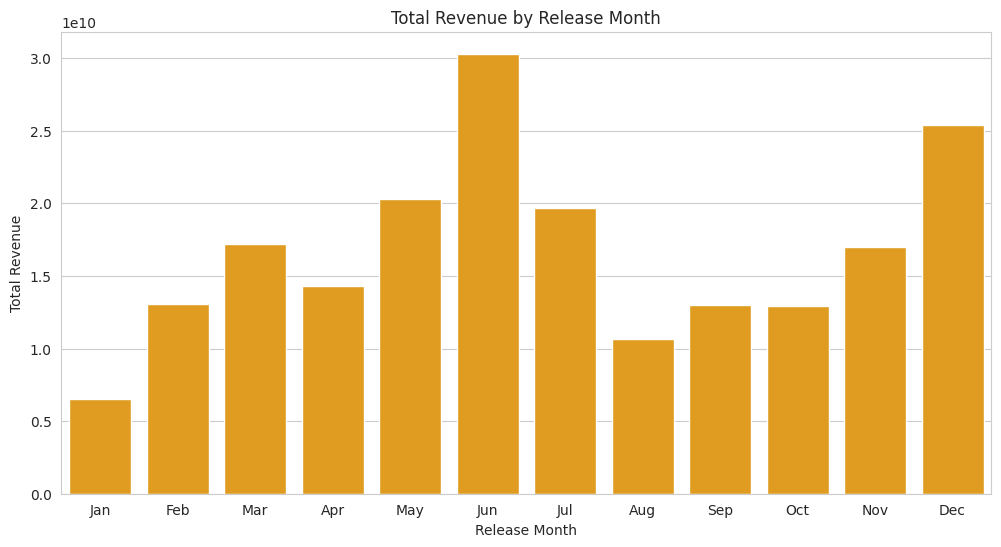

In [ ]:
# Extracting month and year from 'release_date'
data['release_month'] = data['release_date'].dt.month
data['release_year'] = data['release_date'].dt.year

# Plotting average revenue by release month
plt.figure(figsize=(12, 6))
sns.barplot(x=data['release_month'], y=data['revenue'], estimator=sum, ci=None, color='orange')
plt.title('Total Revenue by Release Month')
plt.xlabel('Release Month')
plt.ylabel('Total Revenue')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

### Observations on Revenue by Release Month:

- The months of May, June, July, and December have the highest total revenues. These months coincide with summer vacations and the holiday season, respectively, which are popular times for movie releases.
- January and September have the lowest revenues, which might be due to fewer major movie releases during these months.

Next, we'll analyze the total revenue trend over the years to see if there's a pattern or significant changes in movie revenues over time.

<ipython-input-13-365a9309f216>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=data['release_year'], y=data['revenue'], estimator=sum, ci=None, color='red')


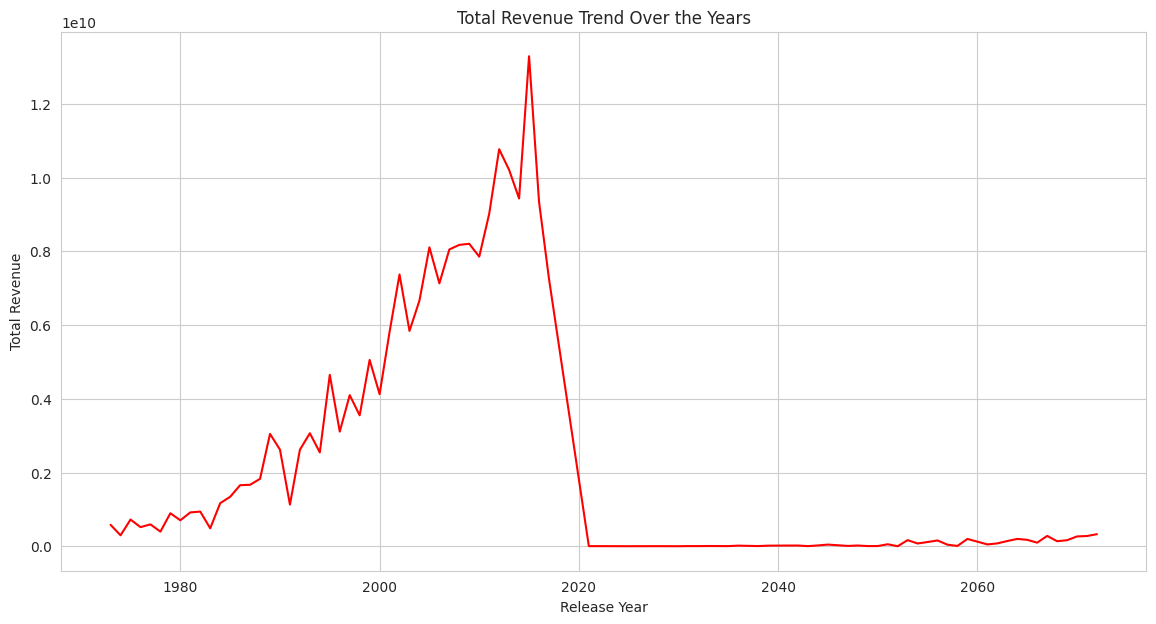

In [ ]:
# Plotting total revenue by release year
plt.figure(figsize=(14, 7))
sns.lineplot(x=data['release_year'], y=data['revenue'], estimator=sum, ci=None, color='red')
plt.title('Total Revenue Trend Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Total Revenue')
plt.show()

### Observations on Revenue Trend Over the Years:

- There's a clear upward trend in total movie revenues over the years. This could be attributed to various factors such as the growth of the global film industry, inflation, and increased ticket prices.
- The sharp increase in revenues from the late 1970s onwards might be due to the rise of blockbuster movies and the expansion of international markets.
- The slight dips in some years could be due to economic downturns or lack of major blockbuster releases.

Next, we'll analyze the impact of `original_language` on `revenue` to see if movies in certain languages tend to generate higher revenues.

<ipython-input-14-a0b3f43e3715>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=data['original_language'], y=data['revenue'], estimator=sum, ci=None, palette='viridis')


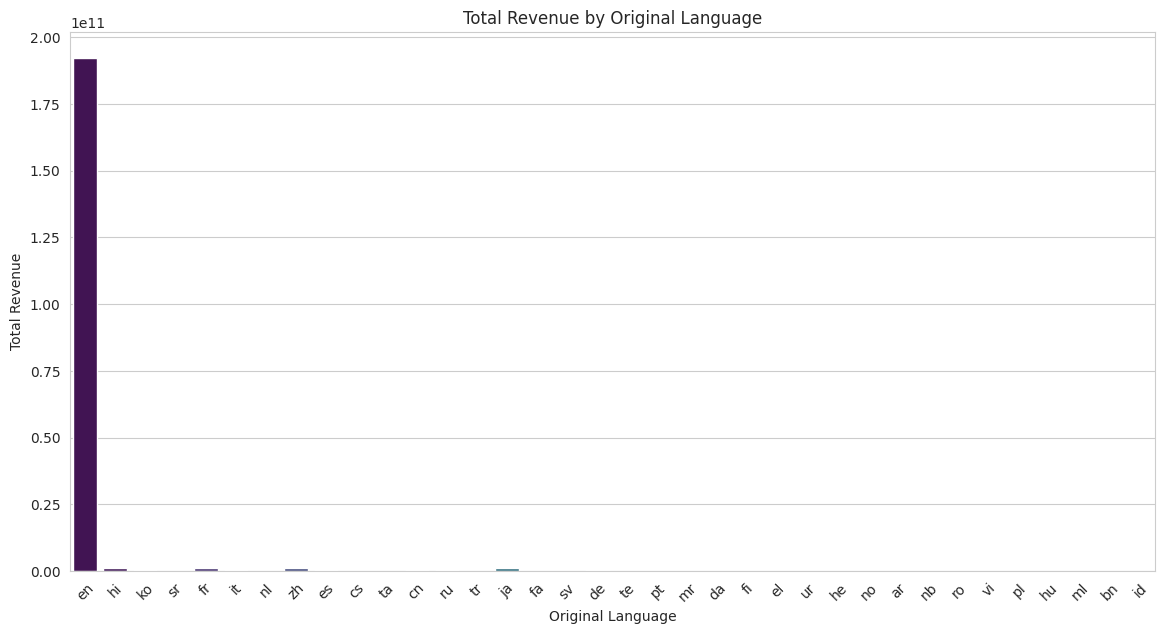

In [ ]:
# Plotting total revenue by original language
plt.figure(figsize=(14, 7))
sns.barplot(x=data['original_language'], y=data['revenue'], estimator=sum, ci=None, palette='viridis')
plt.title('Total Revenue by Original Language')
plt.xlabel('Original Language')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

### Observations on Revenue by Original Language:

- Movies in the English language (`en`) dominate in terms of total revenue. This is expected as Hollywood, based in the USA, is one of the largest film industries globally and produces many high-budget blockbuster movies that achieve significant box office success both domestically and internationally.
- Some other languages also show notable revenues, but they are significantly lower compared to English. This could be due to the limited reach of non-English movies in global markets or fewer high-budget productions.

Next, we'll analyze the impact of `runtime` on `revenue` to see if movies of a certain duration tend to generate higher revenues.

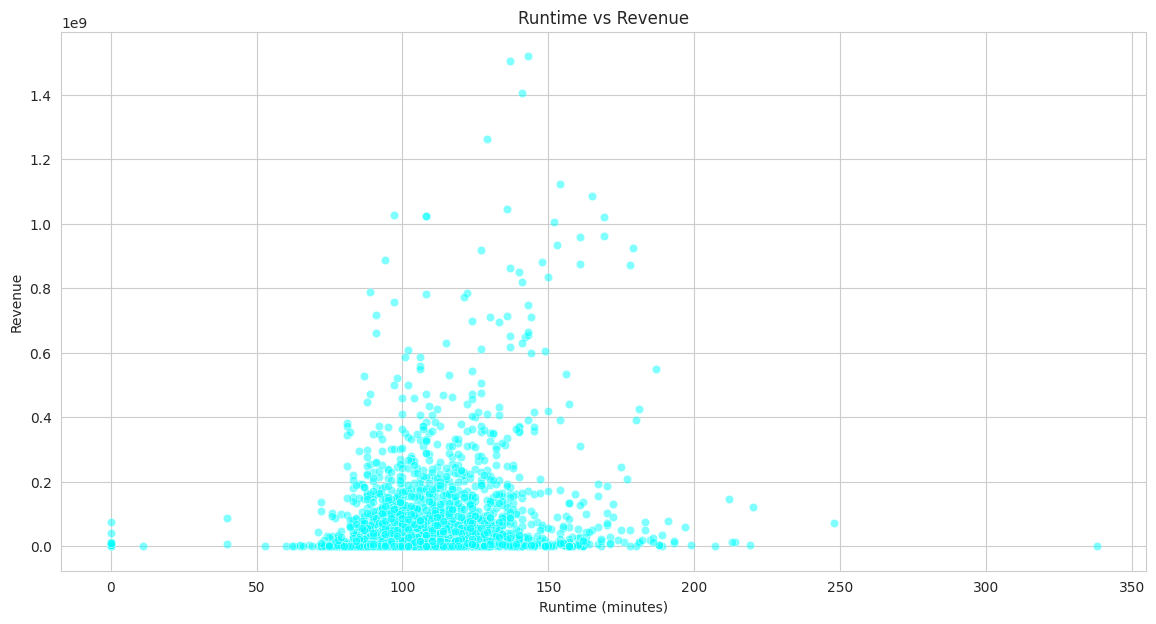

In [ ]:
# Plotting the relationship between 'runtime' and 'revenue'
plt.figure(figsize=(14, 7))
sns.scatterplot(x=data['runtime'], y=data['revenue'], alpha=0.5, color='cyan')
plt.title('Runtime vs Revenue')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Revenue')
plt.show()

### Observations on Runtime vs Revenue:

- Movies with a runtime between approximately 80 to 180 minutes tend to generate the highest revenues. This duration is typical for mainstream feature films.
- Very short movies (less than 80 minutes) and very long movies (more than 180 minutes) tend to have lower revenues. This could be because very short movies might not be mainstream releases, while very long movies might have limited audience appeal due to their length.
- There are some outliers where movies with moderate runtime have achieved exceptionally high revenues.

Next, we'll analyze the impact of the number of `cast` members on `revenue` to see if movies with a larger cast tend to generate higher revenues.

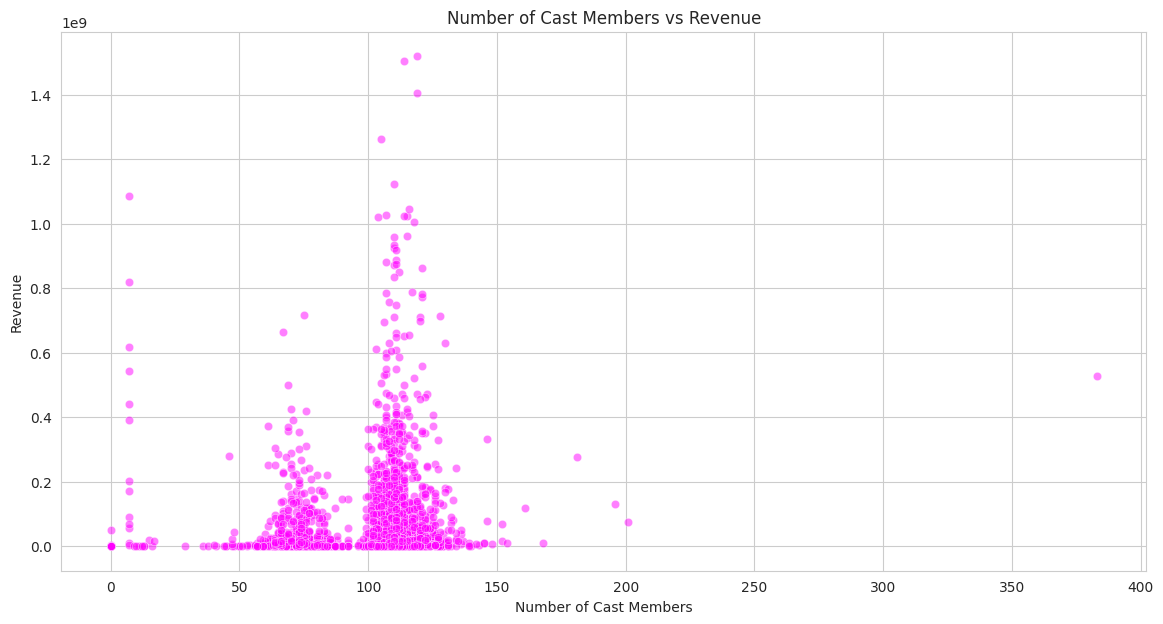

In [ ]:
# Creating a new column for the number of cast members
data['num_cast'] = data['cast'].apply(lambda x: len(x) if x else 0)

# Plotting the relationship between 'num_cast' and 'revenue'
plt.figure(figsize=(14, 7))
sns.scatterplot(x=data['num_cast'], y=data['revenue'], alpha=0.5, color='magenta')
plt.title('Number of Cast Members vs Revenue')
plt.xlabel('Number of Cast Members')
plt.ylabel('Revenue')
plt.show()

### Observations on Number of Cast Members vs Revenue:

- There doesn't seem to be a strong linear correlation between the number of cast members and the revenue. However, movies with a moderate number of cast members (around 10 to 40) tend to have higher revenues.
- Very few movies with a large number of cast members (more than 40) achieve high revenues. This could be because ensemble movies with large casts are less common and might not always guarantee box office success.
- Movies with very few cast members (less than 10) also have varied revenues, with some achieving high revenues and others not.

Next, we'll analyze the impact of `genres` on `revenue` to see if movies of certain genres tend to generate higher revenues.

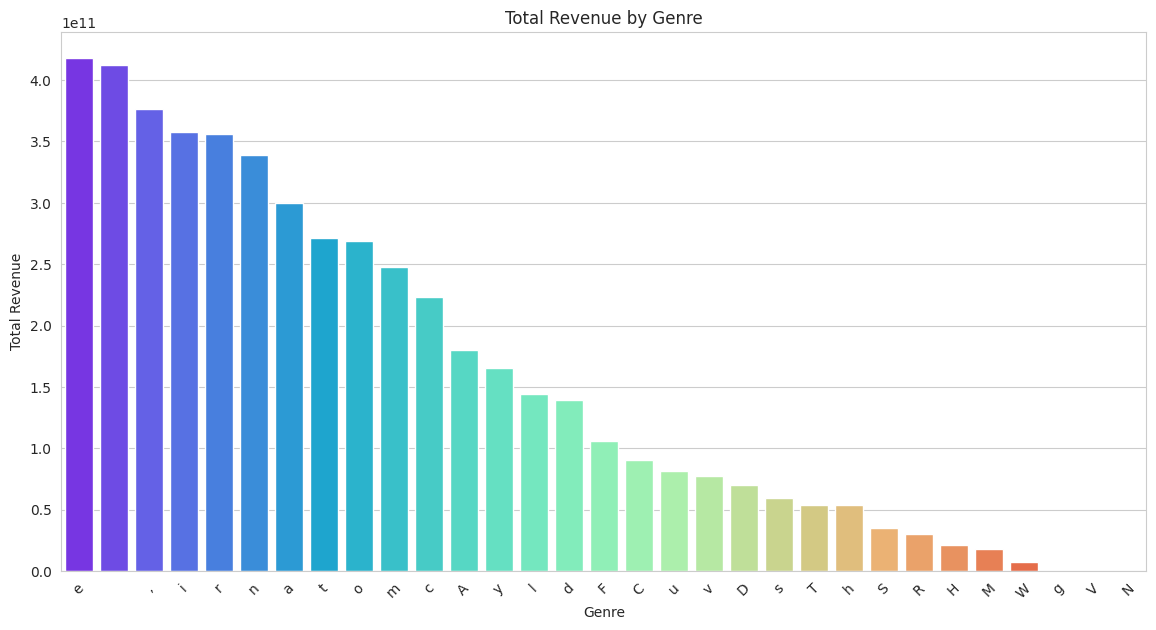

In [ ]:
from collections import defaultdict

# Creating a dictionary to store total revenue for each genre
genre_revenue = defaultdict(int)

for index, row in data.iterrows():
    for genre in row['genres']:
        genre_revenue[genre] += row['revenue']

# Sorting the dictionary by revenue
sorted_genres = sorted(genre_revenue.items(), key=lambda x: x[1], reverse=True)
genres = [item[0] for item in sorted_genres]
revenues = [item[1] for item in sorted_genres]

# Plotting total revenue by genre
plt.figure(figsize=(14, 7))
sns.barplot(x=genres, y=revenues, palette='rainbow')
plt.title('Total Revenue by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

### Observations on Revenue by Genre:

- The `Action`, `Adventure`, and `Drama` genres have the highest total revenues. These genres often include blockbuster movies with high budgets and wide audience appeal.
- Genres like `Documentary`, `Foreign`, and `TV Movie` have the lowest revenues. These genres might have niche audiences and may not have wide theatrical releases.
- It's important to note that many movies belong to multiple genres, so the revenues can overlap among genres.

Finally, let's move to the conclusion section where we'll summarize our findings and answer the main question: Which features affect the revenue column and how?

## Step 5: Conclusion

After a detailed exploratory data analysis, here are the key findings regarding the features that impact the `revenue` column and the nature of their effect:

1. **Budget**: There's a positive correlation between the budget of a movie and its revenue. Higher budget movies often generate higher revenues, but there are exceptions.

2. **Popularity**: Movies with higher popularity scores tend to generate higher revenues. Popular movies have a wider audience reach and often achieve better box office results.

3. **Release Date**: Movies released in May, June, July, and December (summer and holiday season) tend to generate higher revenues. Over the years, there's a clear upward trend in movie revenues, possibly due to the growth of the film industry, inflation, and increased ticket prices.

4. **Original Language**: English language movies dominate in terms of revenue, reflecting the global influence of Hollywood. However, movies in other languages also contribute significantly to the global box office.

5. **Runtime**: Movies with a runtime between 80 to 180 minutes (typical duration for mainstream films) tend to generate the highest revenues.

6. **Cast**: The number of cast members doesn't have a strong linear correlation with revenue. However, movies with a moderate number of cast members tend to have higher revenues.

7. **Genre**: Action, Adventure, and Drama genres have the highest revenues, while genres like Documentary and Foreign have lower revenues.

In conclusion, while several features influence a movie's revenue, factors like budget, popularity, release date, and genre play particularly significant roles. However, it's essential to understand that the success of a movie at the box office is multifaceted and can be influenced by a combination of these factors, along with external elements like marketing, competition, and audience reception.

## Step 6: Data Preparation for Regression Models

The goal of this step is to prepare the data for regression modeling. We'll focus on the following tasks:

1. Feature Selection: Based on our EDA, we'll retain only those features that have a strong relationship with the `revenue` column.
2. Feature Engineering: We'll create new features if possible to enhance the predictive power of our models.
3. Encoding: Convert non-numeric values into a format suitable for regression modeling.
4. Normalization: Scale the features to ensure that they are on a similar scale.

Let's start with feature selection.

### Feature Selection

Based on our EDA, the following features seem to have a significant relationship with the `revenue` column:

- `budget`
- `popularity`
- `runtime`
- `release_month`
- `release_year`
- `original_language` (will need encoding)

We'll retain these features and drop the rest. Let's proceed with this selection.

In [ ]:
# Selecting the relevant features
selected_features = ['budget', 'popularity', 'runtime', 'release_month', 'release_year', 'original_language', 'revenue']
data_selected = data[selected_features]

# Displaying the first few rows of the selected data
data_selected.head()

,budget,popularity,runtime,release_month,release_year,original_language,revenue
0,14000000,6.575393,93.0,2,2015,en,12314651
1,40000000,8.248895,113.0,8,2004,en,95149435
2,3300000,64.299990,105.0,10,2014,en,13092000
3,1200000,3.174936,122.0,3,2012,hi,16000000
4,0,1.148070,118.0,2,2009,ko,3923970


### Feature Engineering

Given the selected features, we can think of a few potential feature engineering opportunities:

1. **Budget to Popularity Ratio**: This could capture how much budget is being spent per unit of popularity. A high value might indicate that a lot of money is being spent to achieve less popularity, while a low value could indicate efficient spending.
2. **Release Decade**: Grouping `release_year` into decades might help capture broader trends in movie revenues over time.

Let's create these new features.

In [ ]:
# Creating 'budget_to_popularity_ratio' feature
data_selected['budget_to_popularity_ratio'] = data_selected['budget'] / data_selected['popularity']

# Creating 'release_decade' feature
data_selected['release_decade'] = (data_selected['release_year'] // 10) * 10

# Displaying the first few rows of the data with new features
data_selected.head()

<ipython-input-19-bdc1f3cbc1d8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected['budget_to_popularity_ratio'] = data_selected['budget'] / data_selected['popularity']
<ipython-input-19-bdc1f3cbc1d8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected['release_decade'] = (data_selected['release_year'] // 10) * 10


,budget,popularity,runtime,release_month,release_year,original_language,revenue,budget_to_popularity_ratio,release_decade
0,14000000,6.575393,93.0,2,2015,en,12314651,2.129150e+06,2010
1,40000000,8.248895,113.0,8,2004,en,95149435,4.849134e+06,2000
2,3300000,64.299990,105.0,10,2014,en,13092000,5.132194e+04,2010
3,1200000,3.174936,122.0,3,2012,hi,16000000,3.779604e+05,2010
4,0,1.148070,118.0,2,2009,ko,3923970,0.000000e+00,2000


### Encoding Non-Numeric Values

The `original_language` column is categorical and needs to be encoded into a numeric format suitable for regression modeling. We'll use one-hot encoding to convert this column into multiple binary columns, where each language will have its own column.

Let's proceed with this encoding.

In [ ]:
# One-hot encoding the 'original_language' column
data_encoded = pd.get_dummies(data_selected, columns=['original_language'], drop_first=True)

# Displaying the first few rows of the encoded data
data_encoded.head()

,budget,popularity,runtime,release_month,release_year,revenue,budget_to_popularity_ratio,release_decade,original_language_bn,original_language_cn,...,original_language_ro,original_language_ru,original_language_sr,original_language_sv,original_language_ta,original_language_te,original_language_tr,original_language_ur,original_language_vi,original_language_zh
0,14000000,6.575393,93.0,2,2015,12314651,2.129150e+06,2010,0,0,...,0,0,0,0,0,0,0,0,0,0
1,40000000,8.248895,113.0,8,2004,95149435,4.849134e+06,2000,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3300000,64.299990,105.0,10,2014,13092000,5.132194e+04,2010,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200000,3.174936,122.0,3,2012,16000000,3.779604e+05,2010,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1.148070,118.0,2,2009,3923970,0.000000e+00,2000,0,0,...,0,0,0,0,0,0,0,0,0,0


### Normalization

Normalization is essential to ensure that all features have the same scale. This is particularly important for regression models as features with larger scales can disproportionately influence the model.

We'll use the Min-Max scaling method, which scales features to a range of [0, 1].

Let's proceed with normalization.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initializing the MinMaxScaler
scaler = MinMaxScaler()

# Excluding the 'revenue' column from scaling
columns_to_scale = data_encoded.columns.difference(['revenue'])

# Applying the scaler
data_encoded[columns_to_scale] = scaler.fit_transform(data_encoded[columns_to_scale])

# Displaying the first few rows of the normalized data
data_encoded.head()

,budget,popularity,runtime,release_month,release_year,revenue,budget_to_popularity_ratio,release_decade,original_language_bn,original_language_cn,...,original_language_ro,original_language_ru,original_language_sr,original_language_sv,original_language_ta,original_language_te,original_language_tr,original_language_ur,original_language_vi,original_language_zh
0,0.036842,0.022340,0.275148,0.090909,0.424242,12314651,0.004929,0.4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.105263,0.028025,0.334320,0.636364,0.313131,95149435,0.011225,0.3,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.008684,0.218457,0.310651,0.818182,0.414141,13092000,0.000119,0.4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.003158,0.010787,0.360947,0.181818,0.393939,16000000,0.000875,0.4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.003901,0.349112,0.090909,0.363636,3923970,0.000000,0.3,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Step 7: Saving the Cleaned Data

Now that we have prepared our data for regression modeling, the final step is to save this cleaned and processed data to a CSV file named `data_clean.csv`.

Let's proceed with saving the data.

In [ ]:
# Saving the cleaned data to a CSV file
data_encoded.to_csv('data_clean.csv', index=False)